### Reference: 
https://didu-story.tistory.com/43?category=937100 
https://www.kaggle.com/code/dogdriip/bike-sharing-demand

## 1. Libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

In [2]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [3]:
%matplotlib inline

## 2. Import datasets

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## 3. Exploratory Data Analysis

In [10]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
test['datetime'] = pd.to_datetime(test['datetime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [12]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [13]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


### 3.1 bike demand  by year

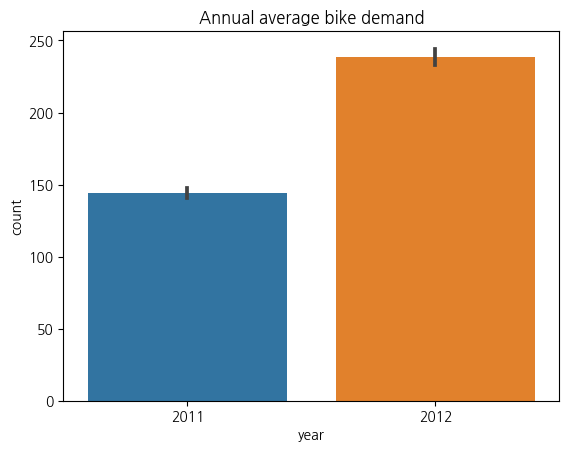

In [14]:
sns.barplot(x='year', y='count', data=train)
plt.title('Annual average bike demand')
plt.show()

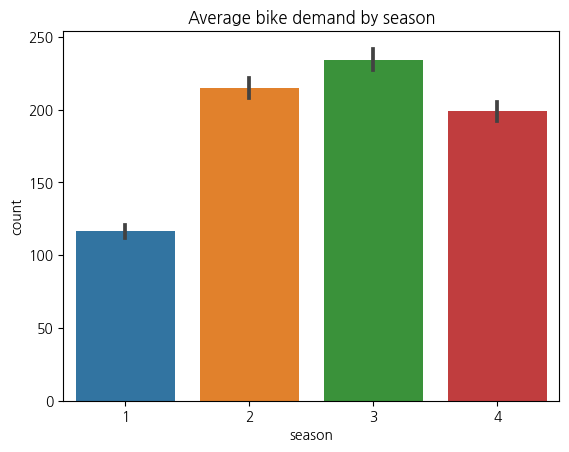

In [15]:
sns.barplot(x='season', y='count', data=train)
plt.title('Average bike demand by season')
plt.show()

In [16]:
print(train[train['season']==1].month.unique())
print(train[train['season']==2].month.unique())
print(train[train['season']==3].month.unique())
print(train[train['season']==4].month.unique())

#1, 2, 3월이 season 1 에 포함되어 있어 가장 낮은 자전거를 대여수를 보인다는 것을 알수 있다

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


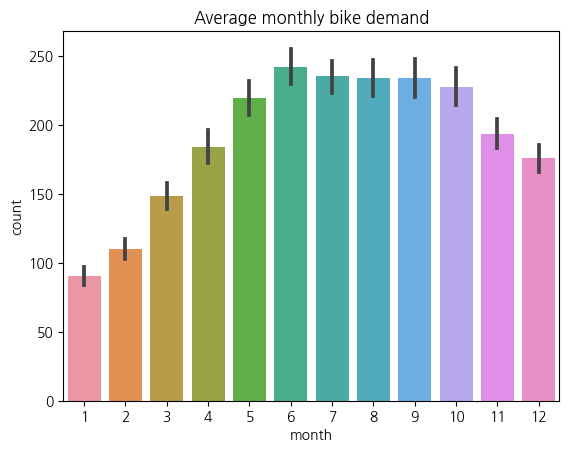

In [17]:
sns.barplot(x='month', y='count', data=train)
plt.title('Average monthly bike demand')
plt.show()

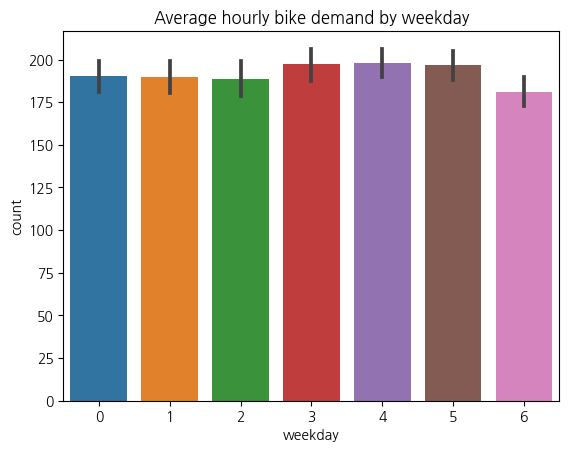

In [18]:
sns.barplot(x='weekday', y='count', data=train)
plt.title('Average hourly bike demand by weekday')
plt.show()

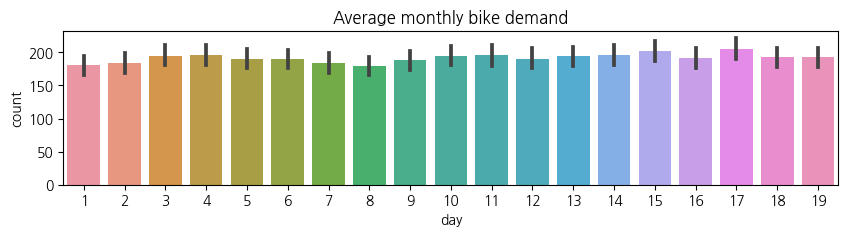

In [19]:
f2 = plt.figure(figsize=(10, 2))
sns.barplot(x=train['day'], y=train['count'])
plt.title('Average monthly bike demand')
plt.show()

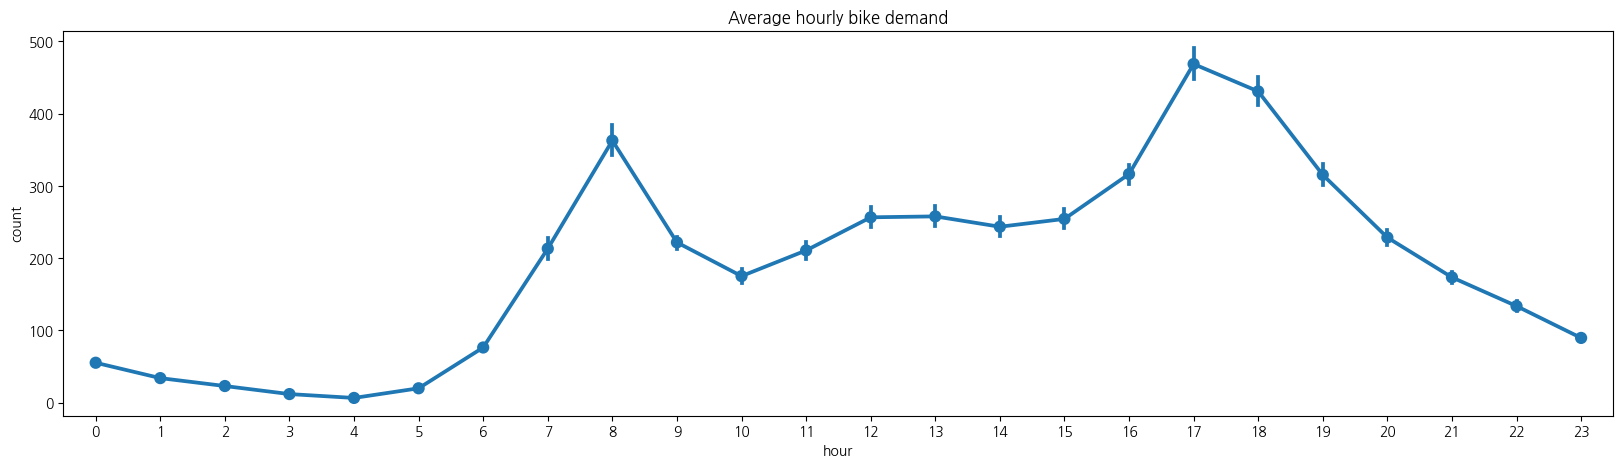

In [20]:
f1 = plt.figure(figsize=(20, 5))
sns.pointplot(x='hour', y='count', data=train)
plt.title('Average hourly bike demand')
plt.show()

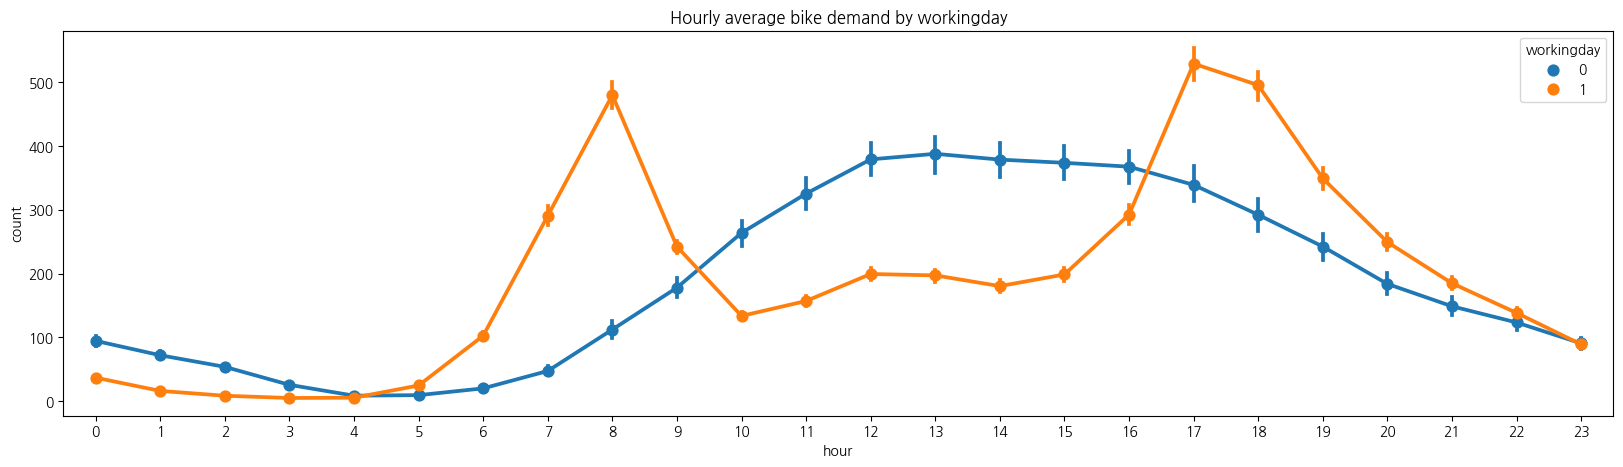

In [21]:
plt.figure(figsize=(20,5))
sns.pointplot(x='hour', y='count', data=train, hue='workingday')
plt.title('Hourly average bike demand by workingday')
plt.show()

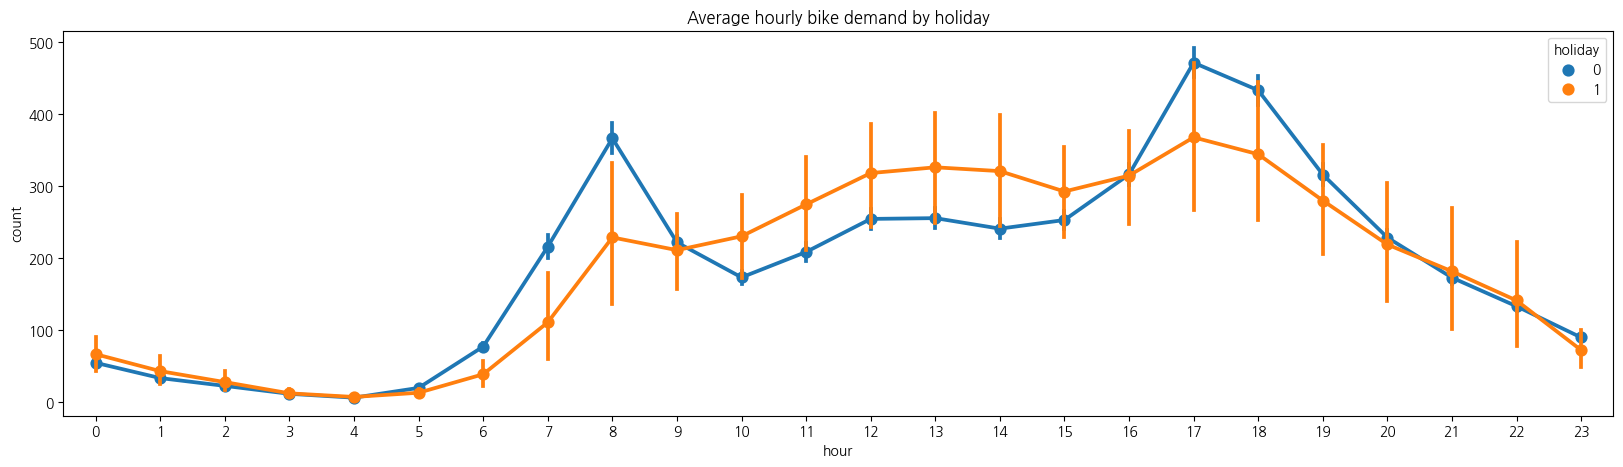

In [22]:
plt.figure(figsize=(20,5))
sns.pointplot(x='hour', y='count', data=train, hue='holiday')
plt.title('Average hourly bike demand by holiday')
plt.show()

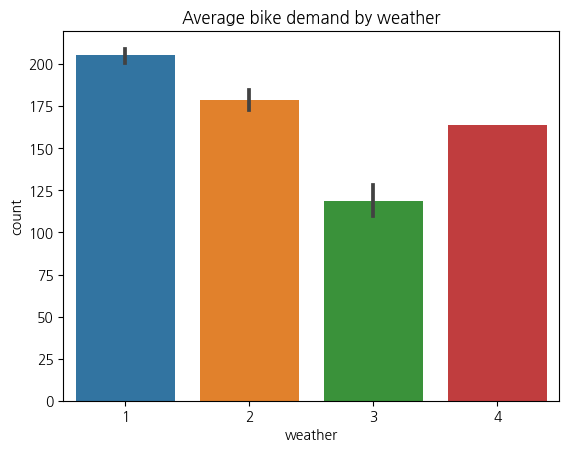

In [23]:
sns.barplot(x='weather', y='count', data=train)
plt.title('Average bike demand by weather')
plt.show()

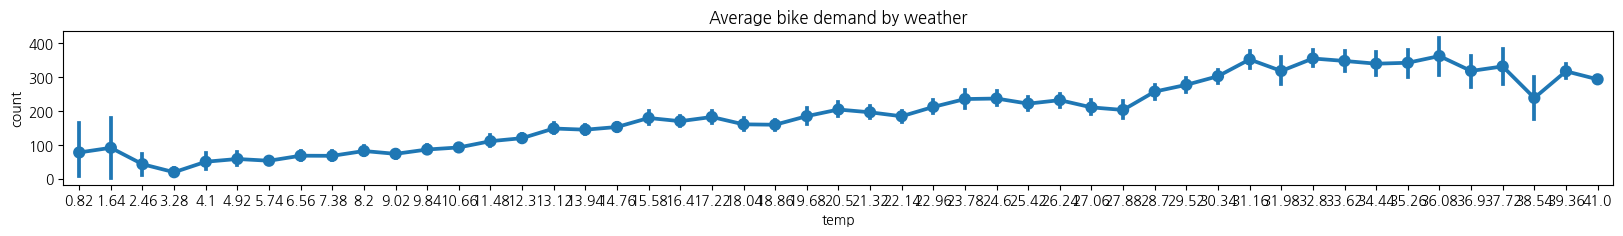

In [24]:
plt.figure(figsize=(20,2))
sns.pointplot(x='temp', y='count', data=train)
plt.title('Average bike demand by weather')
plt.show()

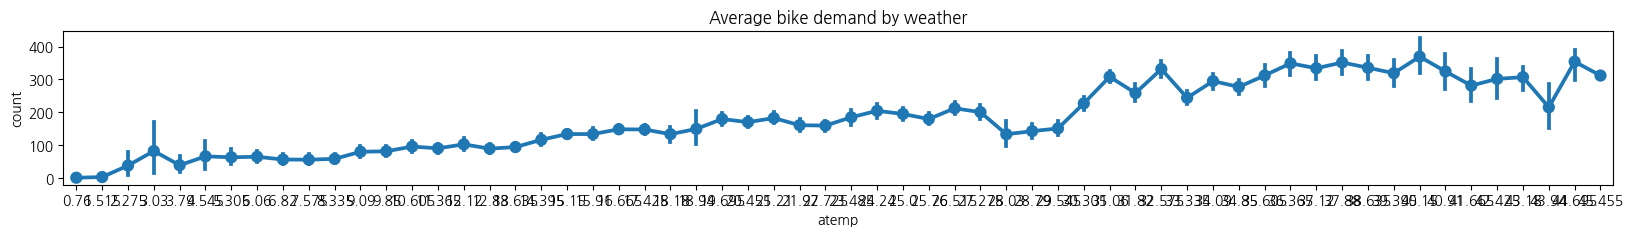

In [25]:
plt.figure(figsize=(20,2))
sns.pointplot(x='atemp', y='count', data=train)
plt.title('Average bike demand by weather')
plt.show()

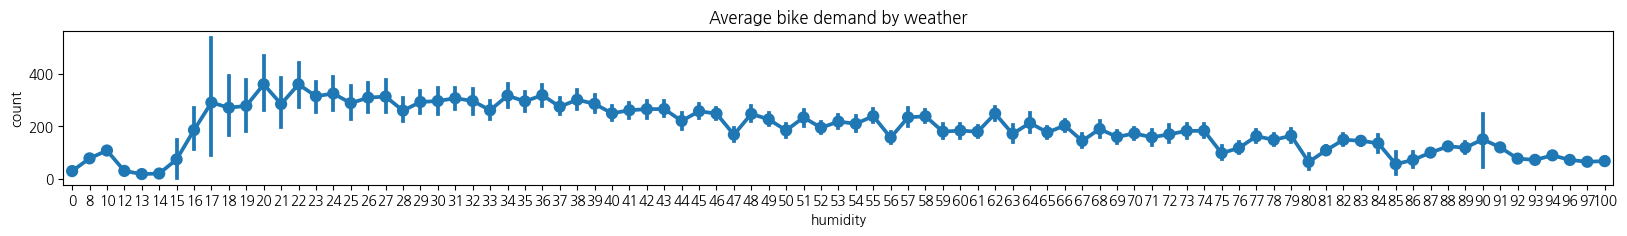

In [26]:
plt.figure(figsize=(20,2))
sns.pointplot(x='humidity', y='count', data=train)
plt.title('Average bike demand by weather')
plt.show()

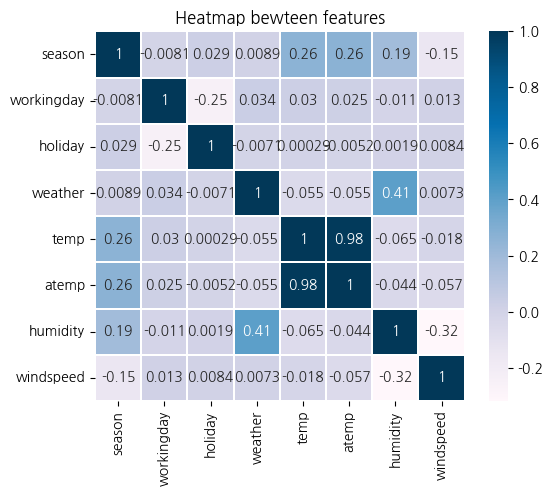

In [27]:
corr_data = train[['datetime', 'season', 'workingday', 'holiday', 'weather', 'temp',
              'atemp', 'humidity', 'windspeed']]
sns.heatmap(corr_data.corr(), cmap=plt.cm.PuBu, linewidth=0.1,
            annot=True, square=True)
plt.title('Heatmap bewteen features')
plt.show()

temp와 atemp의 상관관계가 매우 높아 다중공선성이 의심, temp 변수 하나만 사용할 것이다.

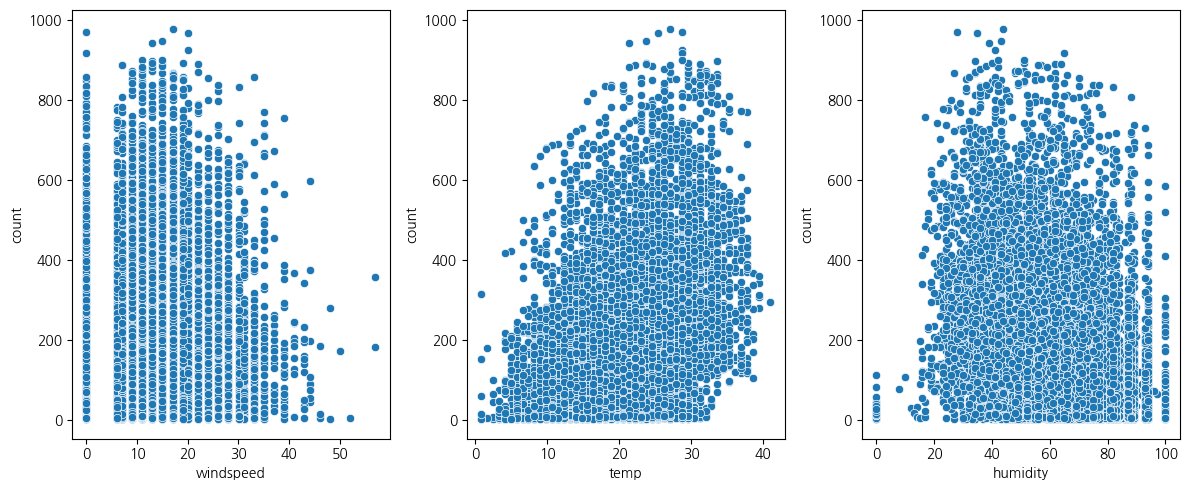

In [28]:
plt.figure(figsize=(12,5))

plt.subplot(131)
sns.scatterplot(x='windspeed', y='count', data=train)

plt.subplot(132)
sns.scatterplot(x='temp', y='count', data=train)

plt.subplot(133)
sns.scatterplot(x='humidity', y='count', data=train)

plt.tight_layout()
plt.show()

In [29]:
len(train[train.windspeed == 0])

1313

## 4. Feature Engineering

데이터의 왜도와 첨도를 살펴보고 조절, IQR방법으로 이상치를 제거하고 Windspeed 이상치(0인 값들)에 대한 feature engineering 진행할 것이다

### 4.1 Removing outliers

우선 연속형 변수의 box plot을 보고 이상치를 살펴 본다

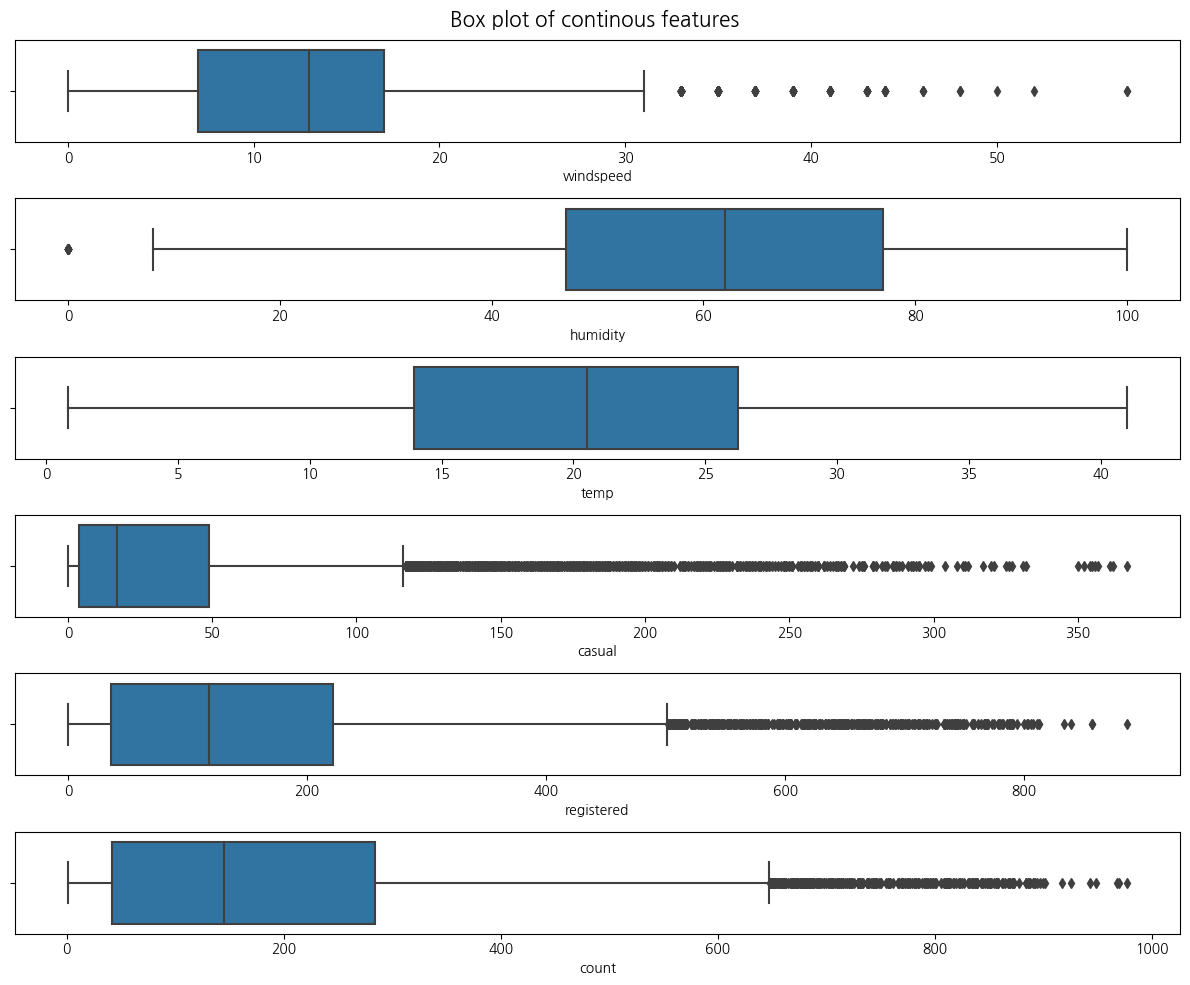

In [30]:
plt.figure(figsize=(12,10))

plt.subplot(611)
sns.boxplot(x='windspeed', data=train)

plt.subplot(612)
sns.boxplot(x='humidity', data=train)

plt.subplot(613)
sns.boxplot(x='temp', data=train)

plt.subplot(614)
sns.boxplot(x='casual', data=train)

plt.subplot(615)
sns.boxplot(x='registered', data=train)

plt.subplot(616)
sns.boxplot(x='count', data=train)

plt.suptitle('Box plot of continous features', size=15, weight=3)
plt.tight_layout()
plt.show()

In [31]:
features1 = ['windspeed', 'humidity', 'temp', 'atemp', 'casual', 'registered', 'count']

for i in features1:
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3 - Q1
    train = train[train[i] < Q3 + 1.5 * IQR]
    train = train[train[i] > Q1 - 1.5 * IQR]
    train = train.reset_index(drop=True)
    
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9359,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
9360,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
9361,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
9362,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [32]:
train.shape

(9364, 17)

### 4.2 windspeed = 0 대체값 찾기

In [33]:
# windspeed의 결측값(widspeed=0)을 RandomForest으로 예측된 값으로 대체한다
import sklearn

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    wind0 = data[data['windspeed'] == 0]
    windnot0 = data[data['windspeed'] != 0]
    
    #windspeed는 날씨변수이기 때문에 날씨변수를 이용해서 windspeed를 예측한다
    col = ['season', 'day', 'weather', 'temp', 'atemp', 'humidity']
    windnot0['windspeed'] = windnot0['windspeed'].astype('str')
    
    rf = RandomForestClassifier()
    # windspeed가 0이 아닌 컬럼으로 fit 해준다
    rf.fit(windnot0[col], windnot0['windspeed'])
    
    
    # windspeed가 0인 부분을 예측
    pred_wind0 = rf.predict(X=wind0[col])
    
    # wind0의 windspeed 값을 pred_win)으로 바꿔주고
    wind0['windspeed'] = pred_wind0
    
    
    # windnot0와 wind0을 합쳐준다
    data = windnot0.append(wind0)
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

train = predict_windspeed(train)
test = predict_windspeed(test)

/var/folders/_n/d87898yn05g63lkk2gtbrwpw0000gn/T/ipykernel_1549/1520861010.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windnot0['windspeed'] = windnot0['windspeed'].astype('str')
/var/folders/_n/d87898yn05g63lkk2gtbrwpw0000gn/T/ipykernel_1549/1520861010.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind0['windspeed'] = pred_wind0
/var/folders/_n/d87898yn05g63lkk2gtbrwpw0000gn/T/ipykernel_1549/1520861010.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pand

In [34]:
len(train[train['windspeed'] == 0])

0

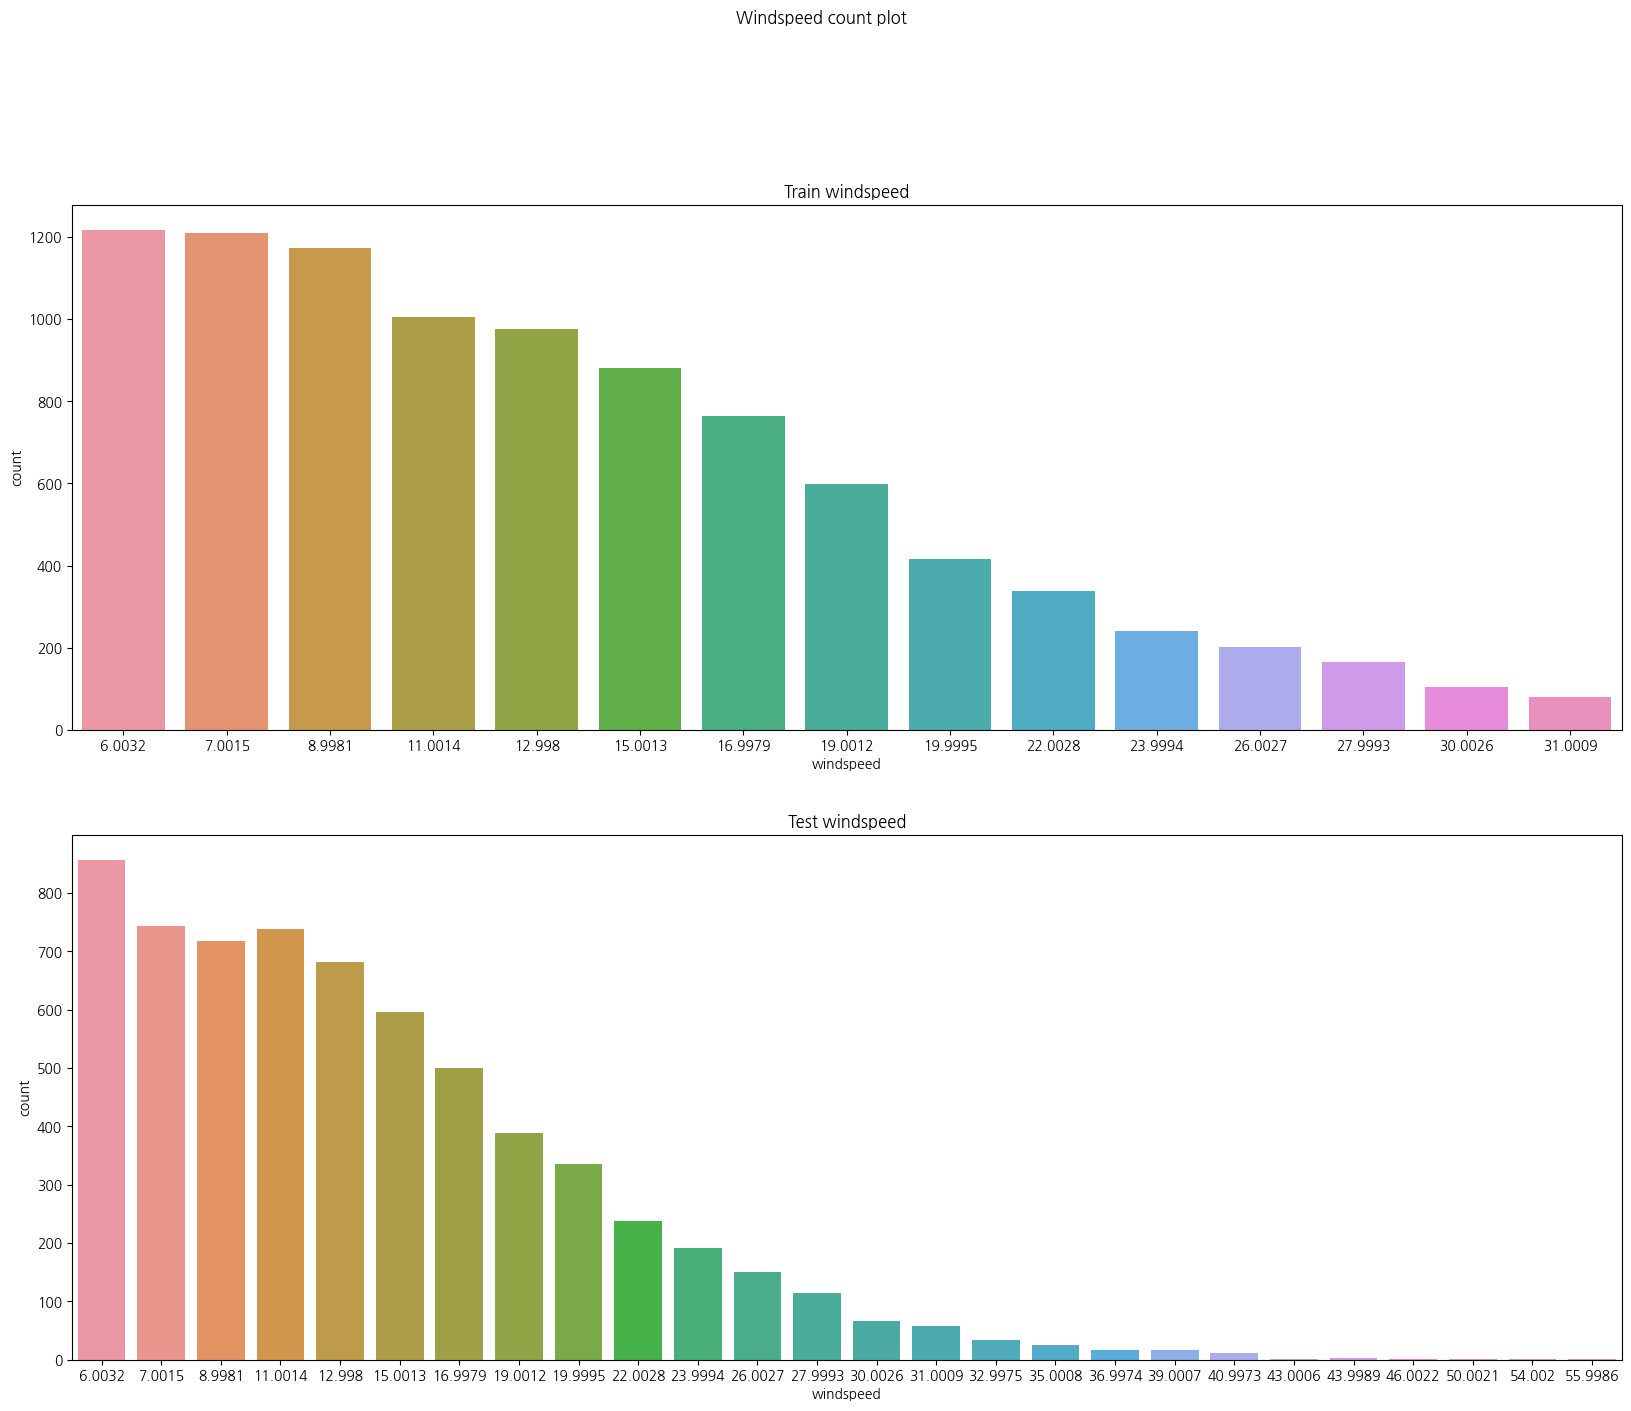

In [35]:
plt.figure(figsize=(20,15))

plt.subplot(211)
sns.countplot(x='windspeed', data=train)
plt.title('Train windspeed')

plt.subplot(212)
sns.countplot(x='windspeed', data=test)
plt.title('Test windspeed')

plt.suptitle('Windspeed count plot', y=1.01)
plt.show()

### 4.3 Skewness & Kurtosis 확인

<Figure size 1000x600 with 0 Axes>

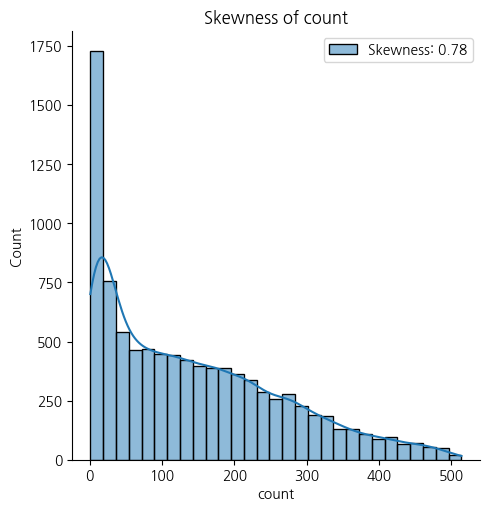

skewness(왜도): 0.78
kurt(첨도): -0.24


In [36]:
# count열 데이터의 왜도와 첨도를 확인해 본다.

plt.figure(figsize=(10, 6))

sns.displot(train['count'], kde=True, label=
             'Skewness: {:.2f}'.format(train['count'].skew()))
plt.title('Skewness of count')
plt.legend(loc=0)
plt.show()
print('skewness(왜도): %.2f' % train['count'].skew())
print('kurt(첨도): %.2f' % train['count'].kurt())

<Figure size 1000x600 with 0 Axes>

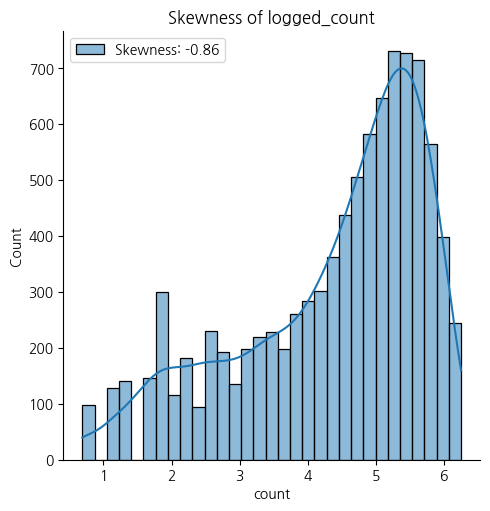

skewness(왜도): -0.86
kurt(첨도): -0.23


In [37]:
# Count가 0에 굉장희 많이 치우쳐져 있는 것을 확인할 수 있다. 따라서 log scaling을 통해 정규화 시켜준다.
# 주의할 점은 count에 log를 취해주었으니 마지막 나온 결과값에 다시 log를 취해줘야 원래 원하던 값을 얻을 수 있다는 것이다.
# log()함수는 log1p()함수를 써서 언더/오버플로 오류를 줄인다. log1p()는 1+log()값으로 log 변환값에 1을 더해 이러한 문제를 해결.
# log1p()는 expm1()함수롤 원래의 스케일로 복원한다

logged_count = np.log1p(train['count'])

plt.figure(figsize=(10, 6))

sns.displot(logged_count, kde=True, label=
             'Skewness: {:.2f}'.format(logged_count.skew()))
plt.title('Skewness of logged_count')
plt.legend(loc=0)
plt.show()
print('skewness(왜도): %.2f' % logged_count.skew())
print('kurt(첨도): %.2f' % logged_count.kurt())

원하는 정규분포는 아니지만 왜곡정도가 많이 향상되었다. 이를 이용해 다음 5장에서 Linear Regression 모델을 학습 후 평가 수행한다.

In [38]:
train['count'] = np.log1p(train['count'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,0.693147,2011,1,1,5,5
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,3.610918,2011,1,1,10,5
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,4.043051,2011,1,1,11,5
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,4.442651,2011,1,1,12,5
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,4.553877,2011,1,1,13,5


year, month, day, hour 열이 추가되었으므로, datetime 열은 삭제한다. 또한 casual은 비등록 대여자, registered은 등록된 사용자로 casual+registered = count이므로 casual과 registered은 따로 필요하지 않음. 오히려 상관관계가 높아 에측성능을 저해야 우려가 있어 이 두열도 삭제한다.

In [39]:
train = train.drop(['datetime', 'casual', 'registered'], axis=1)
test = test.drop('datetime', axis=1)

# 5. Selecting Models

다양한 회귀모델을 데이터 세트에 적용해 예측 성능을 측정한다. 캐글에서 요구한 성능 평가 방법은 RMSLE(Root Mean Squared Logarithmic Error)이다. 즉, 오류값의 로그에 대한 RMSE이다. 사이킷런은 RMSLE을 제공하지 않아 RMSLE을 수행하는 평가 함수를 직접 만들어 본다 

In [40]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

### 5.1 Linear Regression

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['count'], axis=1), train['count'], test_size=0.3)

In [42]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RMSLE:', rmsle(y_test_exp, pred_exp))

RMSLE: 0.9895189407075915


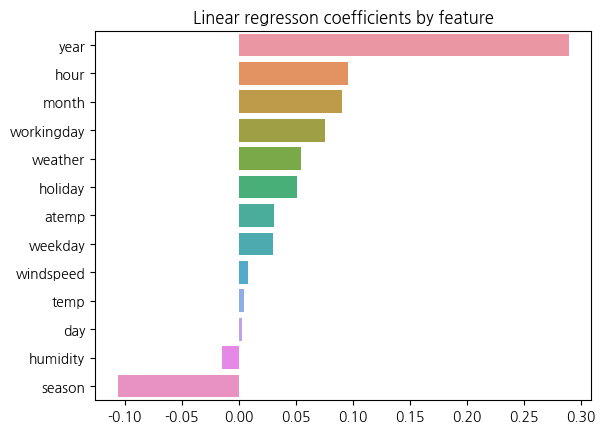

In [43]:
# 각 변수의 회귀 계수를 시각화한다

coef= pd.Series(lr_reg.coef_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=coef.values, y=coef.index)
plt.title('Linear regresson coefficients by feature')
plt.show()

year 변수의 회귀 계수가 독보적으로 크다. year는 2011, 2012 두개의 값으로 되어 있는데 여기에 자전거 대여수가 크게 결정된다는 것은 납득하기 힘들다. year 회귀 계수가 큰 것은 20111, 2012 숫자로 되어 있기 때문. 따라 one-hot encoding을 이용해 카테고리 값으로 변형해야 한다

In [44]:
# 판다스의 get_dummies()을 이용해서 year, month, day, hour, weekday, season, holiday, workingday, weather의 열도 모두 one-hot encoding 한다.

train = pd.get_dummies(train, columns=[
    'year', 'month','day','hour','weekday', 'season', 'holiday', 'workingday', 'weather'])
test = pd.get_dummies(test, columns=[
    'year', 'month','day','hour', 'weekday', 'season', 'holiday', 'workingday', 'weather'])

In [45]:
print(train.shape)
print(test.shape)

(9364, 81)
(6493, 73)


train과 test의 shape을 맞춰주기 위해 align을 사용한다. (https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding )

In [46]:
train, test = train.align(test, join='left', axis=1)
test = test.drop('count', axis=1)

In [47]:
print(train.shape)
print(test.shape)

(9364, 81)
(6493, 80)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['count'], axis=1), train['count'], test_size=0.3)

In [49]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('LinearRegression RMSLE:', rmsle(y_test_exp, pred_exp))

LinearRegression RMSLE: inf


/var/folders/_n/d87898yn05g63lkk2gtbrwpw0000gn/T/ipykernel_1549/1147334875.py:3: RuntimeWarning: divide by zero encountered in log1p
  log_pred = np.log1p(pred)


In [50]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
r_pred = ridge_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
r_pred_exp = np.expm1(r_pred)
print('Ridge RMSLE:', rmsle(y_test_exp, r_pred_exp))

Ridge RMSLE: 0.602017661616737


In [51]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
l_pred = lasso_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
l_pred_exp = np.expm1(l_pred)
print('Lasso RMSLE:', rmsle(y_test_exp, l_pred_exp))

Lasso RMSLE: 0.6489347919769641


원-핫 인코딩을 적용하고 나서 선형 회귀의 예측 성능이 많이 향상되었다. 원-핫 인코딩된 데이터 세트에서 회귀 계수가 높은 피쳐를 다시 시각한다. 원-핫 인코딩으로 피쳐가 늘어났으므로 회귀 계수 상위 25개 피쳐를 추출한다.

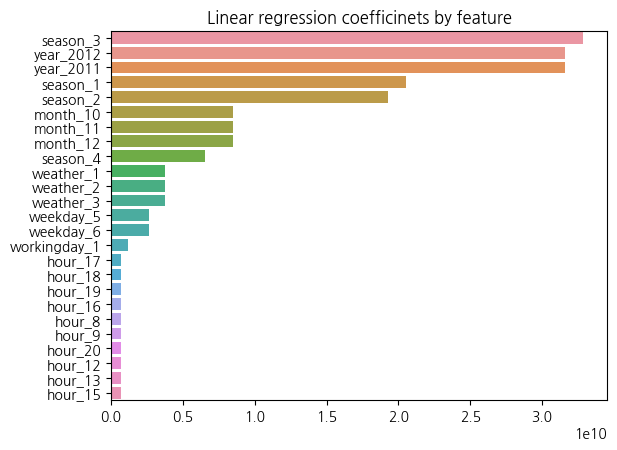

In [52]:
coef = pd.Series(lr_reg.coef_, index=X_train.columns).sort_values(ascending=False)[:25]
sns.barplot(x=coef.values, y=coef.index)
plt.title('Linear regression coefficinets by feature')
plt.show()

### 5.2 Tree Based Models

이번에는 회귀 트리를 이용해 회귀 예측을 한다. 앞에서 적용한 Target 값의 로그 변환된 값과 원-핫 인코딩된 피쳐 세트를 그대로 이용해 랜덤 포레스트, GBM, XGBoost, LightGBM을 순차적으로 성능 평가한다.

In [53]:
# https://github.com/microsoft/LightGBM/issues/5328 <= resolution link
#conda install -c conda-forge lightgbm

In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [56]:
rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
rf_pred_exp = np.expm1(rf_pred)
print('RandomForestRegressor RMSLE: ', rmsle(y_test_exp, rf_pred_exp))

RandomForestRegressor RMSLE:  0.3409542013819589


In [57]:
gb_reg = GradientBoostingRegressor(n_estimators=500)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
gb_pred_exp = np.expm1(gb_pred)
print('GradientBoostingRegressor RMSLE: ', rmsle(y_test_exp, gb_pred_exp))

GradientBoostingRegressor RMSLE:  0.33529846571840705


In [58]:
xgb_reg = XGBRegressor(n_estimators=500)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
xgb_pred_exp = np.expm1(xgb_pred)
print('XGBRegressor RMSLE: ', rmsle(y_test_exp, xgb_pred_exp))

XGBRegressor RMSLE:  0.3348590353874833


In [60]:
lgbm_reg = LGBMRegressor(n_estimators=500)
lgbm_reg.fit(X_train, y_train)
lgbm_pred = lgbm_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
lgbm_pred_exp = np.expm1(lgbm_pred)
print('LBGMRegressor RMSLE: ', rmsle(y_test_exp, lgbm_pred_exp))

LBGMRegressor RMSLE:  0.30786956228951884


트리기반의 모델들이 앞의 선형 회귀보다 예측 성능이 향상된 것을 알 수 있다. 단, 이것은 회귀 트리가 선형 회귀보다 낫다는 뜻은 아니며 데이터 세트에 따라 결과는 달라질 수 있음에 유의한다.

# 6. Prediction and Submission

In [65]:
X_train = train.drop('count', axis=1)
y_train = train['count']
X_test = test

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(9364, 80)
(9364,)
(6493, 80)


In [67]:
lgbm_reg = LGBMRegressor(n_estimators=500)
lgbm_reg.fit(X_train, y_train)
lgbm_pred = lgbm_reg.predict(X_test)

pred_exp = np.expm1(lgbm_pred)

In [68]:
submission = pd.read_csv('sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [69]:
submission['count'] = pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,11.152304
1,2011-01-20 01:00:00,3.031046
2,2011-01-20 02:00:00,1.525043
3,2011-01-20 03:00:00,5.845033
4,2011-01-20 04:00:00,34.322657
...,...,...
6488,2012-12-31 19:00:00,115.261497
6489,2012-12-31 20:00:00,109.115507
6490,2012-12-31 21:00:00,240.717602
6491,2012-12-31 22:00:00,66.468113


In [74]:
submission.to_csv('submission', index=False)